### THIS NOTEBOOK SERVES AS A ROUGH DRAFT - WAY TO GET THROUGH THE WORK I NEED TO DO AND TO UNDERSTAND THE DATA AND CODE I NEED TO USE ##
NOT ALL CELLS WILL PROPERLY RUN! :)

Also as a proof of perseverence and proof of clean up / understanding of code
with some credit references for intellectual understanding linked to the code I used for the final project

# **MJO1C - KONGSBERG EK60 - COMBINED NC FILES BY OOI** #

>*Goals! Goals! Goals! Goals! Goals! Goals! Goals! Goals! Goals! Goals!*
 - Making pretty echograms post cedar creek smoke blown offshore by Easterly winds
  - Experiment with combined files 
  - Clean to ideal frequency for zooplankton(200 khz)
  - Fix corrupted files?
  <div class="alert alert-block alert-info">
    Q's for Kathy --- Can I fix the broken days? Any advice for having additional graphs from different data sets? (oxygen, solar radiation) What are the three different filetypes under the raw data and how would I compile that? How much code from learning becomes problematic? Like following the code on how to get access to and process the OOI raw data for example..

__*Honor Code / Works Cited*__

for understanding x-array merging = 
https://www.geeksforgeeks.org/merge-3-sorted-arrays/

for markdown box customization = 
https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

for echopype understanding = 
 - https://echopype.readthedocs.io/en/v0.8.3/api.html#combine-echodata-objects
 - 
for understanding NaN drops = 
https://docs.xarray.dev/en/latest/generated/xarray.DataArray.dropna.html

for OOI data = 
https://rawdata-west.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/

for understanding dataset merging =
 - https://stackoverflow.com/questions/58494149/merging-xarray-datasets-with-same-extent-but-different-spatial-resolution
 - https://stackoverflow.com/questions/66795406/combine-two-time-series-dataarray
 - 

for graphing data = 
*the homework 3 info and work was incredibly helpful! influenced my data* 
*the sea levels rising demo of rolling mean was very helpful to reference*
https://matplotlib.org/stable/gallery/color/named_colors.html

for efficiently resampling the mean by hour with pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

for issues with plotting oxygen 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

Cleaning data and resetting coords
https://docs.xarray.dev/en/latest/generated/xarray.DataArray.reset_coords.html
https://docs.xarray.dev/en/stable/generated/xarray.DataArray.swap_dims.html




In [11]:
#Big
!pip install echopype 

  Using cached echopype-0.9.0-py3-none-any.whl (253 kB)
  Using cached dask_image-2024.5.3-py3-none-any.whl (59 kB)
  Using cached pynmea2-1.19.0-py3-none-any.whl (30 kB)
  Using cached zarr-2.18.3-py3-none-any.whl (210 kB)
  Using cached s3fs-2024.10.0-py3-none-any.whl (29 kB)
  Using cached aiohttp-3.11.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Using cached xarray_datatree-0.0.6-py3-none-any.whl (42 kB)
  Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
  Using cached flox-0.9.15-py3-none-any.whl (70 kB)
  Using cached numpy_groupies-0.11.2-py3-none-any.whl (40 kB)
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl (14 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached frozenlist-1.5.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (241 kB)
  Using cached multidict-6.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (124 kB)
  Using cached propcache-0.2.0-cp310

In [2]:
#systems to run file processing
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#import echopype as echo
#notworkinnnng
import sys
print(sys.version)
#!pip install --upgrade echopype

3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:08:06) [GCC 11.3.0]


In [14]:
import echopype as ep

SystemError: initialization of _internal failed without raising an exception

In [20]:
#filepaths of every day of EK60 data accumulated into one .nc by OOI (09/04/2022-09/11/2022)
filepath9_5 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220905.nc'
filepath9_6 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220906.nc'
filepath9_7 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220907.nc'
filepath9_8 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220908.nc'
filepath9_9 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220909.nc'
filepath9_10 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Full_20220910.nc'
filepath9_11 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220911.nc'
filepath9_12 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220912.nc'
filepath9_13 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220913.nc'
filepath9_14 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220914.nc'
filepath9_15 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220915.nc'
filepath9_16 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220916.nc'
filepath9_17 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220917.nc'
filepath9_18 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Full_20220918.nc'

In [21]:
#let's open each file so we can then combine and clean
echo_9_5 = xr.open_dataset(filepath9_5)
#echo_9_6 = xr.open_dataset(filepath9_6)
#echo_9_7 = xr.open_dataset(filepath9_7)
#echo_9_8 = xr.open_dataset(filepath9_8)
#echo_9_9 = xr.open_dataset(filepath9_9)
echo_9_10 = xr.open_dataset(filepath9_10)
echo_9_11 = xr.open_dataset(filepath9_11)
echo_9_12 = xr.open_dataset(filepath9_12)
echo_9_13 = xr.open_dataset(filepath9_13)
echo_9_14 = xr.open_dataset(filepath9_14)
echo_9_15 = xr.open_dataset(filepath9_15)
echo_9_16 = xr.open_dataset(filepath9_16)
echo_9_17 = xr.open_dataset(filepath9_17)

#commented out datasets that would keep this error...
#"OSError: [Errno -101] NetCDF: HDF error:....."
#Suspect a corrupt file? perhaps will redownload and reattempt 
#could try creating compiled day of data as well (maybe ask Wendi or Mariella where issue could lie?)

#will at least continue forth with the week following day of smoke (9/9/2022

In [13]:
#making sure I have data!
display(echo_9_5)
#Success!

<xarray.Dataset>
Dimensions:            (frequency_nominal: 3, ping_time: 85827,
                        range_sample: 445)
Coordinates:
    echo_range         (frequency_nominal, range_sample) float32 ...
    nominal_depth      (frequency_nominal, range_sample) float32 ...
  * ping_time          (ping_time) datetime64[ns] 2022-09-05T00:00:00.0594480...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
  * frequency_nominal  (frequency_nominal) float32 3.8e+04 1.2e+05 2e+05
Data variables:
    Sv                 (frequency_nominal, ping_time, range_sample) float32 ...
Attributes:
    title:                   Measurements of the Volume Acoustic Backscatter ...
    summary:                 Volume acoustic backscatter strength measurement...
    project:                 Ocean Observatories Initiative
    acknowledgement:         National Science Foundation
    references:              http://oceanobservatories.org
    creator_name:            Ocean Observatories Initiative
    creator_email:           helpdesk@oceanobservatories.org
    creator_url:             http://oceanobservatories.org
    featureType:             timeSeries
    cdm_data_type:           Station
    Conventions:             CF-1.7
    instrument_orientation:  up

In [22]:
#my attempt to make 1(concat, merge, or combine?)
#they all have consistent dimensions but are in their own temporal space
#Therefor I can use concat along time dimension

# also I just found out I could have combined all with sorted function
#but i am glad i didnt since some files are broken 

print(echo_9_10.dims)
#echocomb_10_17 = xr.concat([echo_9_10, echo_9_11, echo_9_12,echo_9_13, echo_9_14, echo_9_15, echo_9_16, echo_9_17], dim='ping_time')
#so this made my kernel die because it's over 4 gigs :( I'm going to try to do 3 or 5 days at a time now?
echocomb_10_13 = xr.concat([echo_9_10, echo_9_11, echo_9_12,echo_9_13], dim='ping_time')
print(echocomb_10_13.dims)
display(echocomb_10_13)

Frozen({'frequency_nominal': 3, 'ping_time': 85800, 'range_sample': 445})
Frozen({'frequency_nominal': 3, 'ping_time': 343232, 'range_sample': 445})


<xarray.Dataset>
Dimensions:            (frequency_nominal: 3, ping_time: 343232,
                        range_sample: 445)
Coordinates:
    echo_range         (frequency_nominal, range_sample) float32 0.0 ... 84.9
    nominal_depth      (frequency_nominal, range_sample) float32 2.0 ... -82.9
  * ping_time          (ping_time) datetime64[ns] 2022-09-10T00:00:00.0590520...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
  * frequency_nominal  (frequency_nominal) float32 3.8e+04 1.2e+05 2e+05
Data variables:
    Sv                 (frequency_nominal, ping_time, range_sample) float32 n...
Attributes:
    title:                   Measurements of the Volume Acoustic Backscatter ...
    summary:                 Volume acoustic backscatter strength measurement...
    project:                 Ocean Observatories Initiative
    acknowledgement:         National Science Foundation
    references:              http://oceanobservatories.org
    creator_name:            Ocean Observatories Initiative
    creator_email:           helpdesk@oceanobservatories.org
    creator_url:             http://oceanobservatories.org
    featureType:             timeSeries
    cdm_data_type:           Station
    Conventions:             CF-1.7
    instrument_orientation:  up

In [23]:
#we know it worked! (hopefully)
echo_coords_10_13 = echocomb_10_13.coords
echo_vars_10_13 = echocomb_10_13.data_vars
display(echo_coords_10_13, echo_vars_10_13)

Coordinates:
    echo_range         (frequency_nominal, range_sample) float32 0.0 ... 84.9
    nominal_depth      (frequency_nominal, range_sample) float32 2.0 ... -82.9
  * ping_time          (ping_time) datetime64[ns] 2022-09-10T00:00:00.0590520...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
  * frequency_nominal  (frequency_nominal) float32 3.8e+04 1.2e+05 2e+05

Data variables:
    Sv       (frequency_nominal, ping_time, range_sample) float32 nan ... -44.93

In [24]:
#I know that optimal frequency for zooplankton visibilty is 200kHz or 200,000 Hz
echocomb_10_13_200khz = echocomb_10_13.sel(frequency_nominal=200000)
display(echocomb_10_13_200khz)

times_10_13 = echocomb_10_13_200khz['ping_time']
depth_10_13 = echocomb_10_13_200khz['range_sample']
#missing mean backscatter

<xarray.Dataset>
Dimensions:            (ping_time: 343232, range_sample: 445)
Coordinates:
    echo_range         (range_sample) float32 0.0 0.1912 0.3824 ... 84.71 84.9
    nominal_depth      (range_sample) float32 2.0 1.809 1.618 ... -82.71 -82.9
  * ping_time          (ping_time) datetime64[ns] 2022-09-10T00:00:00.0590520...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
    frequency_nominal  float32 2e+05
Data variables:
    Sv                 (ping_time, range_sample) float32 nan nan ... -44.93
Attributes:
    title:                   Measurements of the Volume Acoustic Backscatter ...
    summary:                 Volume acoustic backscatter strength measurement...
    project:                 Ocean Observatories Initiative
    acknowledgement:         National Science Foundation
    references:              http://oceanobservatories.org
    creator_name:            Ocean Observatories Initiative
    creator_email:           helpdesk@oceanobservatories.org
    creator_url:             http://oceanobservatories.org
    featureType:             timeSeries
    cdm_data_type:           Station
    Conventions:             CF-1.7
    instrument_orientation:  up

In [27]:
#I am missing MVBS or Mean Volume Backscatter Depth
#let's calculate it and double check that our existing parameters are logical
#print(echocomb_10_13_200khz.nominal_depth)
#print(echocomb_10_13_200khz.ping_time)

#OK-they both make sense (are in the right depth and time ranges in ascending order)
#currently my data is raw as Sv(backscatter strength, dB)
#I will look at it now and then try cleaning it


#plt.figure(figsize=(12,6))
#rawsv_gram = plt.pcolormesh(times_10_13, depth_10_13, echocomb_10_13_200khz['Sv'].T)



#OK SO... plotting the raw SV isn't going to work (too big - is crashing horrendously)
#let's mean it and make it more manageable maybe? fewer points? :(

#First I will pick a bin range for depth known to be from surface to around 80
#so an average for every 5 m makes sense to try 
#depth_bins = np.arange(-85, 0, 5)
#there are floats or non numbers/nans so let's get those out of here
#update var = var[set].dropnafunction
#can not drop NaN since not index or label


echocomb_10_13_200kh = echocomb_10_13_200khz['Sv'].drop
MVBS_10_13 = echocomb_10_13_200khz.Sv.groupby_bins(echocomb_10_13_200khz['nominal_depth'], echocomb_10_13_200khz[''])


pls_work = echocomb_10_13_200khz.compute_MVBS_index_binning(echocomb_10_13_200khz)
#display(pls_work)

#OK I will now try a different file ENTIRELy :") 
#We are onto minimal data cleaning for Leo pleasssse I can't do it

In [3]:
#filepaths
fp_828_904 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220828-20220904_Calibrated_Sv_Averaged.nc'
fp_904_911 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220904-20220911_Calibrated_Sv_Averaged (1).nc'
fp_911_918 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220911-20220918_Calibrated_Sv_Averaged.nc'
fp_918_925 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220918-20220925_Calibrated_Sv_Averaged.nc'
fp_925_1002 = 'calib_ek60_nc_mj01c/CE02SHBP_Bioacoustic_Echogram_20220925-20221002_Calibrated_Sv_Averaged.nc'
#open data
xr_828_904 = xr.open_dataset(fp_828_904)
xr_904_911 = xr.open_dataset(fp_904_911)
xr_911_918 = xr.open_dataset(fp_911_918)
xr_918_925 = xr.open_dataset(fp_918_925)
xr_925_1002 = xr.open_dataset(fp_925_1002)
#clean data
xr_828_904_200 = xr_828_904.sel(frequency_nominal=200000)
xr_904_911_200 = xr_904_911.sel(frequency_nominal=200000)
xr_911_918_200 = xr_911_918.sel(frequency_nominal=200000)
xr_918_925_200 = xr_918_925.sel(frequency_nominal=200000)
xr_925_1002_200 = xr_925_1002.sel(frequency_nominal=200000)
#define variables within data

#9/04-9/11/2022
times_904_911 = xr_904_911_200['ping_time']
depth_904_911 = xr_904_911_200['nominal_depth']
sv_904_911 = xr_904_911_200['Sv']
#9/04-9/11/2022
times_904_911 = xr_904_911_200['ping_time']
depth_904_911 = xr_904_911_200['nominal_depth']
sv_904_911 = xr_904_911_200['Sv']
#9/11-9/18/2022
times_911_918 = xr_911_918_200['ping_time']
depth_911_918 = xr_911_918_200['nominal_depth']
sv_911_918 = xr_911_918_200['Sv']
#9/18-9/25/2022
times_904_911 = xr_904_911_200['ping_time']
depth_904_911 = xr_904_911_200['nominal_depth']
sv_904_911 = xr_904_911_200['Sv']
#9/25-10/02/2022
times_911_918 = xr_911_918_200['ping_time']
depth_911_918 = xr_911_918_200['nominal_depth']
sv_911_918 = xr_911_918_200['Sv']

<xarray.Dataset>
Dimensions:            (frequency_nominal: 3, range_sample: 445, ping_time: 672)
Coordinates:
    echo_range         (frequency_nominal, range_sample) float32 ...
    nominal_depth      (frequency_nominal, range_sample) float32 ...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
  * frequency_nominal  (frequency_nominal) float32 3.8e+04 1.2e+05 2e+05
  * ping_time          (ping_time) datetime64[ns] 2022-09-04 ... 2022-09-10T2...
Data variables:
    Sv                 (ping_time, frequency_nominal, range_sample) float32 ...
Attributes:
    title:                   Measurements of the Volume Acoustic Backscatter ...
    summary:                 Volume acoustic backscatter strength measurement...
    project:                 Ocean Observatories Initiative
    acknowledgement:         National Science Foundation
    references:              http://oceanobservatories.org
    creator_name:            Ocean Observatories Initiative
    creator_email:           helpdesk@oceanobservatories.org
    creator_url:             http://oceanobservatories.org
    featureType:             timeSeries
    cdm_data_type:           Station
    Conventions:             CF-1.7
    instrument_orientation:  up

<xarray.Dataset>
Dimensions:            (frequency_nominal: 3, range_sample: 445, ping_time: 672)
Coordinates:
    echo_range         (frequency_nominal, range_sample) float32 ...
    nominal_depth      (frequency_nominal, range_sample) float32 ...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
  * frequency_nominal  (frequency_nominal) float32 3.8e+04 1.2e+05 2e+05
  * ping_time          (ping_time) datetime64[ns] 2022-09-11 ... 2022-09-17T2...
Data variables:
    Sv                 (ping_time, frequency_nominal, range_sample) float32 ...
Attributes:
    title:                   Measurements of the Volume Acoustic Backscatter ...
    summary:                 Volume acoustic backscatter strength measurement...
    project:                 Ocean Observatories Initiative
    acknowledgement:         National Science Foundation
    references:              http://oceanobservatories.org
    creator_name:            Ocean Observatories Initiative
    creator_email:           helpdesk@oceanobservatories.org
    creator_url:             http://oceanobservatories.org
    featureType:             timeSeries
    cdm_data_type:           Station
    Conventions:             CF-1.7
    instrument_orientation:  up

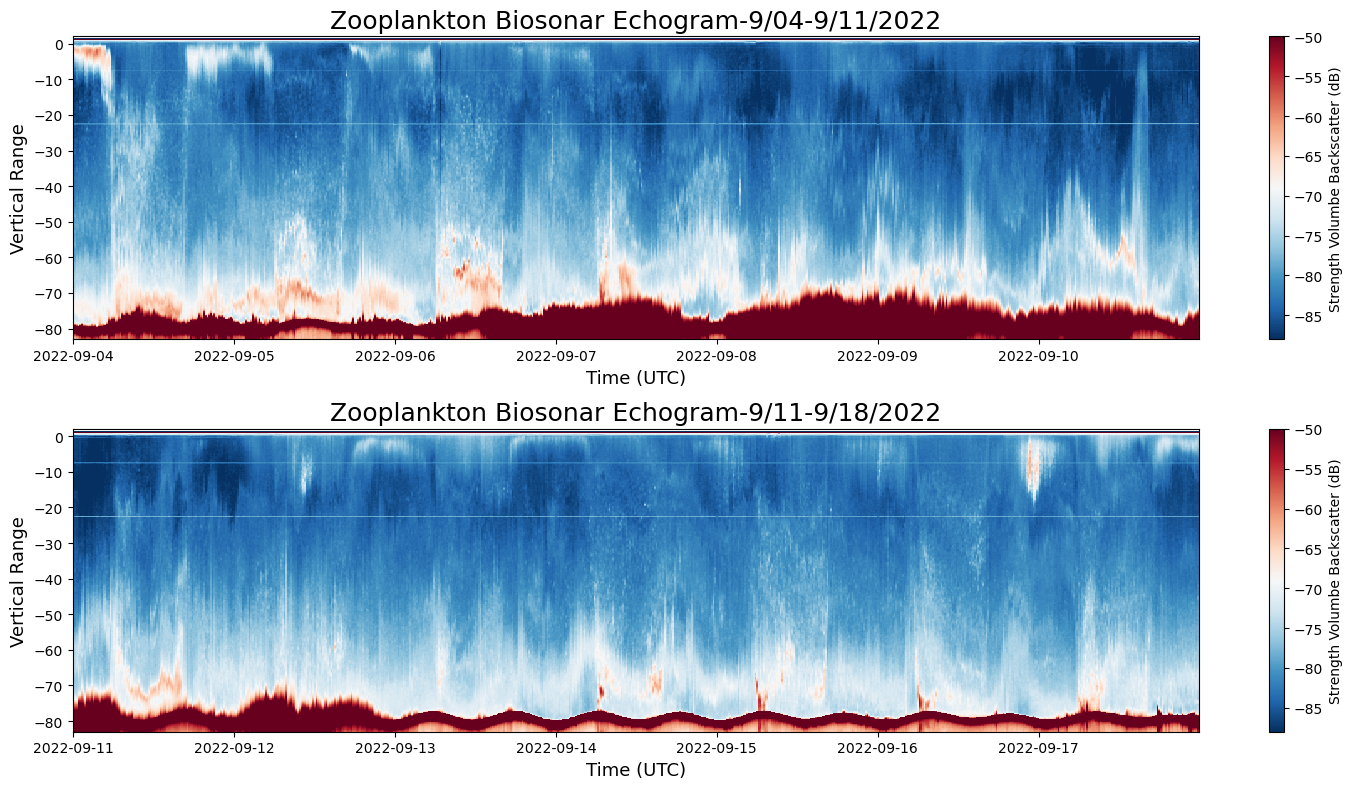

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

echogram1 = axs[0].pcolormesh(times_904_911, depth_904_911, sv_904_911.T, cmap='RdBu_r', vmin=-50, vmax=-80)
axs[0].set_xlabel('Time (UTC)', fontsize =13)
axs[0].set_ylabel('Vertical Range', fontsize =13)
axs[0].set_title('Zooplankton Biosonar Echogram-9/04-9/11/2022', fontsize =18)
plt.colorbar(echogram1, label='Strength Volumbe Backscatter (dB)')

echogram2 = axs[1].pcolormesh(times_911_918, depth_911_918, sv_911_918.T, cmap='RdBu_r', vmin=-50, vmax=-80)
axs[1].set_xlabel('Time (UTC)', fontsize =13)
axs[1].set_ylabel('Vertical Range', fontsize =13)
axs[1].set_title('Zooplankton Biosonar Echogram-9/11-9/18/2022', fontsize =18)
plt.colorbar(echogram2, label='Strength Volumbe Backscatter (dB)')

plt.tight_layout()

In [64]:
print(depth_904_911)
depth_904_911.dims

#GOAL

#have python and conda on computer 
##echopype (needs new environment without conflict)
###sv --> mvbs

#### Request par data with coordinates of station 

<xarray.DataArray 'range_sample' (range_sample: 445)>
array([  0,   1,   2, ..., 442, 443, 444], dtype=int32)
Coordinates:
    echo_range         (range_sample) float32 ...
    nominal_depth      (range_sample) float32 ...
  * range_sample       (range_sample) int32 0 1 2 3 4 5 ... 440 441 442 443 444
    frequency_nominal  float32 2e+05
Attributes:
    long_name:  Vertical Range Bin Number
    comment:    Bin number starting with 0 at the sensor face, used to derive...
    units:      count


('range_sample',)

__*More Questions for Kathy*__

How do I get back resolution? 

Where can I find the parameters of the way Sv was averaged?

Should I go back and process the raw data? 

But how can I if it's so many gigs and I don't understand the code on calling through direct access and then is it plagiarizing if I use code directly to process raw data?

In [ ]:
#First I'm going to bring several days together

#Actually I'm not sure I'll do that properly at all, I'm going to instead figure out how to map and clean
#a singular day and then copy and paste that code for every day into many pretty echograms
#let's start with first unbroken day after fire...
echo_9_5

In [ ]:
#Maybe for my lost figure I could look at oxygen, solar radiation or fuorometer?



 ### WORKING THROUGH THE OTHER PARAMETERS ###


In [2]:
#systems to run file processing
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#OK, now that we have our echograms let's look at more parameters
#opened dataset of dissolved oxygen, pc02 and CTD parameters
#open data with xr function since I am not worried about working with finnicky raw data that I have to go back on forth on 
CTD_828_912 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220828T000001.742501-20220912T115959.157583.nc")
CTD_912_927 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220912T120000.157696-20220927T115959.296888.nc")
CTD_927_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220927T120000.297313-20221002T000000.750964.nc")
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")
#fp_PC02_828_1002_uncalibbed = "o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_20220828T000512.023252-20221002T230511.305625.nc"
PC02_826_1007 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_cal_20220826T130554.642857-20221007T200555.074407.nc")
#hashed out 1 of pc02 -will use calibrated pc02 and clean it up to match the correct day once opened
#open datasets with xr in order to efficiently get rolling mean 
#due to high variance in data - a rolling mean will be more accomodating and reflective of dynamic conditions


In [4]:
#Display Datasets to see if anything needs cleaning othet then PC02 dates
#Also useful to better understand parameters for plotting
#display(CTD_828_912)
#display(CTD_912_927)
#display(CTD_927_1002)
#display(DO_828_1002)
#display(PC02_826_1007)
#The lat and lon are not given in attributes od echo data so I crossreffed with OOInet 
#this is cited in README file

#Hashing things out so I can selectively go back to look at my variables when needed

#print(PC02_826_1007.data_vars)
print(PC02_826_1007['time'])

print(DO_828_1002.data_vars)
print(DO_828_1002['time'])
#Now I know what I want to extract specifically! :)

<xarray.DataArray 'time' (obs: 9)>
[9 values with dtype=datetime64[ns]]
Coordinates:
  * obs      (obs) int32 0 1 2 3 4 5 6 7 8
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
Data variables:
    oxy_calphase                  (obs) float64 ...
    preferred_timestamp           (obs) object ...
    oxygen                        (obs) float64 ...
    ctd_tc_oxygen                 (obs) float64 ...
    ingestion_timestamp           (obs) datetime64[ns] ...
    ctd_tc_oxygen_qc_executed     (obs) uint8 ...
    port_timestamp                (obs) datetime64[ns] ...
    deployment                    (obs) int32 ...
    dissolved_oxygen              (obs) float64 ...
    id                            (obs) |S36 ...
    corrected_dissolved_oxygen    (obs) float64 ...
    oxy_temp                      (obs) float64 ...
    internal_timestamp            (obs) datetime64[ns] ...
    time                          (obs) datetime64[ns] ...
    dissolved_oxygen_qc_

In [5]:
#OK, now that we have our echograms let's look at more parameters
#opened dataset of dissolved oxygen, pc02 and CTD parameters
#open data with xr function since I am not worried about working with finnicky raw data that I have to go back on forth on 
CTD_828_912 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220828T000001.742501-20220912T115959.157583.nc")
CTD_912_927 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220912T120000.157696-20220927T115959.296888.nc")
CTD_927_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample_20220927T120000.297313-20221002T000000.750964.nc")
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")
#fp_PC02_828_1002_uncalibbed = "o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_20220828T000512.023252-20221002T230511.305625.nc"
PC02_826_1007 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_cal_20220826T130554.642857-20221007T200555.074407.nc")
#hashed out 1 of pc02 -will use calibrated pc02 and clean it up to match the correct day once opened
#open datasets with xr in order to efficiently get rolling mean 
#due to high variance in data - a rolling mean will be more accomodating and reflective of dynamic conditions
display(DO_828_1002['time'])
print(PC02_826_1007['time'])

<xarray.DataArray 'time' (obs: 3022866)>
[3022866 values with dtype=datetime64[ns]]
Coordinates:
  * obs      (obs) int32 0 1 2 3 4 5 ... 3022861 3022862 3022863 3022864 3022865
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T

<xarray.DataArray 'time' (obs: 9)>
[9 values with dtype=datetime64[ns]]
Coordinates:
  * obs      (obs) int32 0 1 2 3 4 5 6 7 8
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T


In [6]:
print(DO_828_1002)

<xarray.Dataset>
Dimensions:                       (obs: 3022866)
Coordinates:
  * obs                           (obs) int32 0 1 2 ... 3022863 3022864 3022865
Data variables: (12/19)
    oxy_calphase                  (obs) float64 ...
    preferred_timestamp           (obs) object ...
    oxygen                        (obs) float64 ...
    ctd_tc_oxygen                 (obs) float64 ...
    ingestion_timestamp           (obs) datetime64[ns] ...
    ctd_tc_oxygen_qc_executed     (obs) uint8 ...
    ...                            ...
    time                          (obs) datetime64[ns] ...
    dissolved_oxygen_qc_executed  (obs) uint8 ...
    driver_timestamp              (obs) datetime64[ns] ...
    dissolved_oxygen_qc_results   (obs) uint8 ...
    oxygen_from_calphase          (obs) float64 ...
    ctd_tc_oxygen_qc_results      (obs) uint8 ...
Attributes: (12/57)
    node:                            LJ01D
    comment:                         
    publisher_email:                 
   

In [21]:
#Open datasets with xr and convert to pd to convert to datetime
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")
PC02_826_1007 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_cal_20220826T130554.642857-20221007T200555.074407.nc")
#print(DO_828_1002['time'])
#print(PC02_826_1007['time'])

#Convert and shorten data to correct temporal space and adding a reset index to attempt to fix time issue
DO_828_1002 = DO_828_1002.to_dataframe().reset_index()
PC02_826_1007 = PC02_826_1007.to_dataframe().reset_index()
#print(DO_828_1002['time'])
#print(PC02_826_1007['time'])

#That worked and no datetime conversion needed anymore and can plot after time selection
#Ensure time in main index
PC02_826_1007.set_index('time', inplace=True)
PC02_828_1002 = PC02_826_1007.loc['2022-8-28 00:00:00':'2022-10-02 23:59:59']

#Not getting the mean correctly so cleaning for just in cases
#Drop NaN values just in case they are present since this is an easy pd fucntion 
DO_828_1002 = DO_828_1002.dropna()
PC02_828_1002 = PC02_828_1002.dropna()
print(PC02_828_1002['pco2w_b_absorbance_blank_434'].describe())
print(DO_828_1002['oxygen'].describe())

#I keep running into issues so i am reformatting into datetime just incase
PC02_826_1007['time'] = pd.to_datetime(PC02_826_1007['time'], errors='coerce')
DO_826_1007['time'] = pd.to_datetime(DO_826_1007['time'], errors='coerce')

#Want to plot the mean for every hour (currently too many data points)
#hourly_pco2 = PC02_828_1002['pco2w_b_absorbance_blank_434'].resample('H').mean()
#hourly_do = DO_828_1002['oxygen'].resample('H').mean()

count       98.000000
mean     12641.571289
std        152.772903
min      12401.000000
25%      12497.000000
50%      12605.000000
75%      12753.000000
max      12877.000000
Name: pco2w_b_absorbance_blank_434, dtype: float64
count    3.022866e+06
mean     8.140393e+05
std      2.457572e+05
min      3.897820e+05
25%      6.170470e+05
50%      7.614100e+05
75%      1.010670e+06
max      1.355735e+06
Name: oxygen, dtype: float64


KeyError: 'time'

In [24]:
#Open datasets with xr and convert to pd to convert to datetime
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")

#Convert and shorten data to correct temporal space and adding a reset index to attempt to fix time issue
DO_828_1002 = DO_828_1002.to_dataframe().reset_index()

#Drop NaN values just in case they are present since this is an easy pd fucntion 
DO_828_1002 = DO_828_1002.dropna()

#Set time as main index with set_index
DO_828_1002.set_index('time', inplace=True)

#Attempt to get hourly mean with resample function
hourly_do = DO_828_1002['oxygen'].resample('H').mean()

In [27]:
#Open datasets with xr and convert to pd to convert to datetime
PC02_826_1007 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_cal_20220826T130554.642857-20221007T200555.074407.nc")

#Convert and shorten data to correct temporal space and adding a reset index to attempt to fix time issue
PC02_826_1007 = PC02_826_1007.to_dataframe().reset_index()

#Correct temporal space
PC02_828_1002 = PC02_826_1007.loc['2022-8-28 00:00:00':'2022-10-02 23:59:59']

#Drop NaN values just in case they are present since this is an easy pd fucntion 
PC02_828_1002 = PC02_828_1002.dropna()

#Set time as main index with set_index
PC02_828_1002.set_index('time', inplace=True)

#Attempt to get hourly mean with resample function
hourly_do = PC02_828_1002['pco2w_b_absorbance_blank_434'].resample('H').mean()

In [ ]:
#Plot 
#Open datasets with xr and convert to pd to convert to datetime
PC02_826_1007 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-09-PCO2WB103-streamed-pco2w_b_sami_data_record_cal_20220826T130554.642857-20221007T200555.074407.nc")

#Convert and shorten data to correct temporal space and adding a reset index to attempt to fix time issue
PC02_826_1007 = PC02_826_1007.to_dataframe().reset_index()

#Correct temporal space
PC02_828_1002 = PC02_826_1007.loc['2022-8-28 00:00:00':'2022-10-02 23:59:59']

#Drop NaN values just in case they are present since this is an easy pd fucntion 
PC02_828_1002 = PC02_828_1002.dropna()

#Set time as main index with set_index
PC02_828_1002.set_index('time', inplace=True)

#Attempting error fix with datetime optionals
PC02_828_1002.index = pd.to_datetime(PC02_828_1002.index, errors='coerce')

#Attempt to get hourly mean with resample function
hourly_pco2 = PC02_828_1002['pco2w_b_absorbance_blank_434'].resample('H').mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hourly_pco2.index, hourly_do, label='Hourly Mean Carbon Dioxide')



###### I spent an ungodly stupid amount of hours trying to plot oxygen and carbon dioxide but could only do carbon dioxide 
## Will just have to settle with one more parameter if I can muster it in addition to oxygen 


In [3]:
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")
#Xarray does not have time as coordinate - let's fix and drop unnec. coords
DO_828_1002 = DO_828_1002.set_coords('time')  # Ensure time is coord
if 'obs' in DO_828_1002.dims:  # Drop obs
    DO_828_1002 = DO_828_1002.drop_dims('obs')
#errors coerce to attempt mitigating invalid values as optional to datetime
DO_828_1002['time'] = pd.to_datetime(DO_828_1002['time'].values, errors='coerce')
#Issues plotting so attempting additional cleaning with NaN removal in time
DO_828_1002 = DO_828_1002.dropna(subset=['time'])
#Still not working so had to learn how to drop more non working values
DO_828_1002 = DO_828_1002.where(~DO_828_1002['time'].isnull(), drop=True)
#Ensuring time is indexed again since still not working
DO_828_1002 = DO_828_1002.set_index(time='time')
#DO has too many data points so I will get the rolling mean to plot in addition


KeyError: 'time'

In [5]:
DO_828_1002 = xr.open_dataset("o_shelf_data/deployment0009_CE02SHBP-LJ01D-06-DOSTAD106-streamed-do_stable_sample_20220828T000000.742909-20221002T000001.750972.nc")

# Convert time to a coordinate from var
DO_828_1002 = DO_828_1002.set_coords('time')

# Replace obs dimension with time
DO_828_1002 = DO_828_1002.swap_dims({'obs': 'time'})

#I want obs fully gone after the hassle it has caused
DO_828_1002 = DO_828_1002.drop_vars('obs')

# Converting time to datetime and dropping invalid entries (NaN & NaT)
DO_828_1002['time'] = pd.to_datetime(DO_828_1002['time'].values, errors='coerce')
DO_828_1002 = DO_828_1002.dropna(dim='time', subset=['time'])

# Verify I've resolved my torment
print(DO_828_1002)

<xarray.Dataset>
Dimensions:                       (time: 3022866)
Coordinates:
  * time                          (time) datetime64[ns] 2022-08-28T00:00:00.7...
Data variables: (12/18)
    oxy_calphase                  (time) float64 ...
    preferred_timestamp           (time) object ...
    oxygen                        (time) float64 ...
    ctd_tc_oxygen                 (time) float64 ...
    ingestion_timestamp           (time) datetime64[ns] ...
    ctd_tc_oxygen_qc_executed     (time) uint8 ...
    ...                            ...
    internal_timestamp            (time) datetime64[ns] ...
    dissolved_oxygen_qc_executed  (time) uint8 ...
    driver_timestamp              (time) datetime64[ns] ...
    dissolved_oxygen_qc_results   (time) uint8 ...
    oxygen_from_calphase          (time) float64 ...
    ctd_tc_oxygen_qc_results      (time) uint8 ...
Attributes: (12/57)
    node:                            LJ01D
    comment:                         
    publisher_email:       

In [6]:
#ROLLING MEAN WOULD REQUIRE WAY MORE WORK WILL RESAMPLE AND PLOT BUT THIS IS WHAT I HAD FOR THAT
#Getting the rolling mean by hour to plot against data for clarity
do_rolling = DO_828_1002['oxygen'].rolling(window='1H', min_periods=1, center=True).mean()
#Getting the rolling mean by day to plot against data for clarity
do_rolling = DO_828_1002['oxygen'].rolling(window='1d', min_periods=1, center=True).mean()

TypeError: '<=' not supported between instances of 'str' and 'int'

In [7]:

#Running into issues -reesampling means for days and hours to plot against all data
#Index time at pd datetimeindex
DO_828_1002.set_index('time', inplace=True)
do_time_index = pd.to_datetime(DO_828_1002['time'].values)

#Since datetime in place this makes most sense rather then restructuring points needed for window calc of rolling means
daily_mean_do = DO_828_1002['oxygen'].resample('D').mean()  
hourly_mean_do = DO_828_1002['oxygen'].resample('H').mean() 

#Have to interpolate in order to match dimensions so they can be plotted side by side
daily_mean_do_interp = daily_mean_do.reindex(DO_828_1002.index, method='nearest')
hourly_mean_do_interp = hourly_mean_do.reindex(DO_828_1002.index, method='nearest')
ax.plot(DO_828_1002['time'], daily_mean_do_int, color='cadetblue', label='Daily Mean of Oxygen')
ax.plot(DO_828_1002['time'], hourly_mean_do, color='steelblue', label='Hourly Mean of Oxygen')


SyntaxError: invalid syntax (662659907.py, line 15)